In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
from PIL import Image
from keras.models import load_model

Using TensorFlow backend.


In [2]:
model = load_model('models/mnist.h5')

In [3]:
def img_show(img):
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [4]:
def get_class(i):
    letter = '0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z a b c d e f g h i j k l m n o p q r s t u v w x y z'
    letter_list = letter.split()
    print(letter_list[i])

In [5]:
def img_load(i):
    path = 'digits/%s.png' % i
    img = Image.open(path).convert('LA')
    width = 28
    height = 28
    img = img.resize((width, height), Image.BILINEAR)
    path = 'digits/%s_gray.png' % i
    img.save(path)

In [6]:
def img_normalize(img):
    return img / 255

In [7]:
def img_threshold(img):
    ret, thresh = cv.threshold(img, 100, 255, cv.THRESH_BINARY)
    return thresh

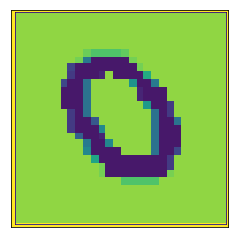

In [25]:
img = cv.imread('datasets/00073.png', 0)
img_show(img)

In [26]:
img.shape

(224, 224)

In [28]:
img = cv.resize(img, (28, 28))
img = img.reshape(1, 28, 28, 1)
img.shape

(1, 28, 28, 1)

In [30]:
img

array([[[[142],
         [129],
         [129],
         [129],
         [129],
         [129],
         [129],
         [129],
         [129],
         [129],
         [129],
         [129],
         [129],
         [129],
         [129],
         [129],
         [129],
         [129],
         [129],
         [129],
         [129],
         [129],
         [129],
         [129],
         [129],
         [129],
         [129],
         [129]],

        [[149],
         [215],
         [215],
         [215],
         [215],
         [215],
         [215],
         [215],
         [215],
         [215],
         [215],
         [215],
         [215],
         [215],
         [215],
         [215],
         [215],
         [215],
         [215],
         [215],
         [215],
         [215],
         [215],
         [215],
         [215],
         [215],
         [215],
         [215]],

        [[149],
         [215],
         [215],
         [215],
         [215],
         [215],
    

In [29]:
P = model.predict_classes(img)
print(get_class(P[0]))

3
None


In [55]:
def main():
    i = input()
    img_load(i)
    path = 'datasets/%s' % i
    img = cv.imread(path)
    img = img_threshold(img)
    img = img_normalize(img)
    img_show(img)
    img_list = list()
    for i, j in enumerate(img):
        for k, l in enumerate(j):
            img_list.append(np.unique(l))
    img = np.asarray(img_list)
    img = img.reshape(1, 28, 28, 1)
    P = model.predict_classes(img)
    print(get_class(P[0]))

8


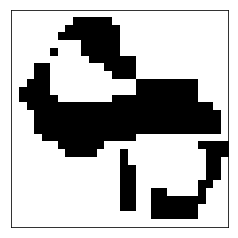

3
None


In [56]:
main()